In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
import csv
from urllib.request import urlopen

# reads in data from the given url and 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

#print(lines)
data = pd.read_csv(url)

In [3]:
# clean the data
data = data.dropna(subset=['continent'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
def quantile_group(df, col_name):
    '''Creates a new column in the DataFrame that splits countries into four quantiles
    Args:
        df (DataFrame), covid dataframe
        col_name (str), select a column name to split into quantiles
    Returns:
        hdi_df (DataFrame), new dataframe with new categorized column'''
    # creates an empty list to save all the HDI_groups
    group_lst = list()
    for ind, row in df.iterrows():
        # 0 - 25th Percentile
        if ((row[col_name] > df[col_name].min()) & (row[col_name] <= df[col_name].quantile(0.25))):
            group_lst.append('Low: 0 - 25th Percentile')
        # 25th - 50th Percentile
        elif ((row[col_name] > df[col_name].quantile(0.25)) & (row[col_name] <= df[col_name].quantile(0.5))):
            group_lst.append('Medium: 25th - 50th Percentile')
            # same thing
        # 50th - 75th Percentile    
        elif ((row[col_name] > df[col_name].quantile(0.5)) & (row[col_name] <= df[col_name].quantile(0.75))):
            group_lst.append('High: 50th - 75th Percentile')
        # 75th - 100th Percentile
        elif ((row[col_name] > df[col_name].quantile(0.75)) & (row[col_name] <= df['gdp_per_capita'].max())):
            group_lst.append('Very High: 75th - 100th Percentile')
        # if there is no data, give it a NaN
        else:
            group_lst.append(np.nan)
    
    # adds new column to df      
    df[f'{col_name}_Group'] = group_lst
    
    return df

In [6]:
# hdi_df = quantile_group(data, 'human_development_index')

In [11]:
def group_plot(data, plt_col, group_col):
    '''plots a line plot of the new grouped categories
    Args:
        data (DataFrame), take in the dataframe with the HDI_Group column
        plt_col (str), choose a column to plot on the y-axis
        group_col (str), select the new categorized column you created with the quantile_group function
    Returns:
        plot, returns a line plot with one line for every HDI_group where Date is the x-axis'''
    
    # group data with date and group_col as index. Get mean
    grouped_df = data.groupby(['date', group_col])[plt_col].mean().reset_index()
    
    # plot dataframe and set titles and labels
    sns.set(font_scale = 1.3)
    sns.lineplot(data=grouped_df, x="date", y=plt_col, hue = group_col)
    plt.gcf().set_size_inches(12, 8)
    plt.title(f'{plt_col} by {group_col}')
    plt.xlabel('Date')
    plt.ylabel(plt_col)
    
    # Set X range. Using left and right variables makes it easy to change the range.
    left = dt.date(2020, 1, 1)
    right = dt.date(2021, 4, 19)
    
    # Changes x-axis range
    plt.gca().set_xbound(left, right)

/Users/Rikin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


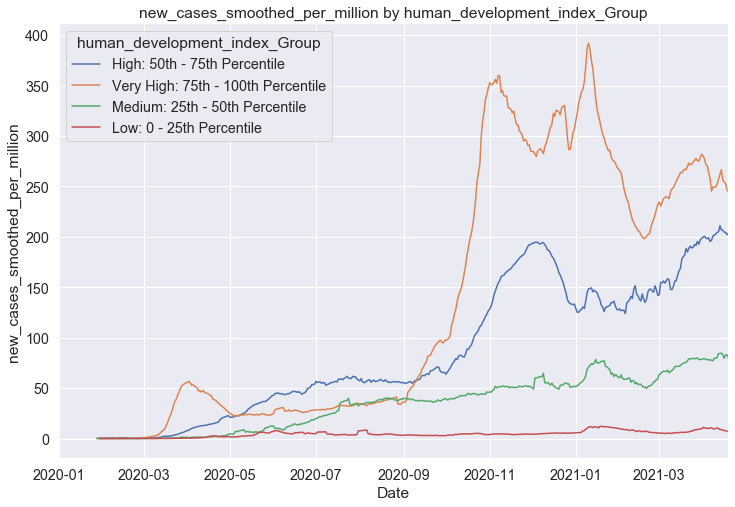

In [14]:
# # call and plot function with new_cases_smoothed_per_million as the y-axis and HDI_group as the different lines
# group_plot(hdi_df, 'new_cases_smoothed_per_million', 'human_development_index_Group')

This graph shows the average number of new covid cases (smoothed over a 7-day period) based on the Human Development Index (HDI) Group it is in. This shows that the countries with High and Very High HDI measures averaged  more new cases per million than Medium and Low HDI countries. Factors that may have led to higher averages could be higher populations in countries of a higher HDI category. 

The HDI is a measure of a long life, being educated and the standard of living. The higher the number, the greater the overall development of the country. Each country is split into quantiles that defines what HDI Group level they belong too. The HDI measure was created by the [United Nations Development Programme (UNDP)] (http://hdr.undp.org/en/content/human-development-index-hdi). 

In [ ]:
# get DataFrame that categorizes countries by GDP data
gdp_df = quantile_group(data, 'gdp_per_capita')

In [ ]:
# call and plot function with new_cases_smoothed_per_million as the y-axis and HDI_group as the different lines
group_plot(gdp_df, 'new_cases_smoothed_per_million', 'gdp_per_capita_Group')